**You can edit the exercises directly in the cells.**<br>
- **Jupyter notebook quick start:**
- \<Shift>+\<Return> --> runs a cell
- ! --> shell escape [! Linux command line]
- use a (above) and b (below) left of the [ ] to open new cells
&nbsp;<br>;<br>

# Mass-Spring-Damper System Dynamics for Free Vibrations

## Learning Objectives

Running this code and analyzing the results will help you:
* To understand the dynamics of a mass-spring-damper system for free vibrations
* Implement and apply Euler's method for numerical integration
* Simulate free vibrations for different damping conditions
* Analyze system responses
* Understand the role of time step size in simulations

---

---

## Governing Equations

In free vibration, no external force is acting on the system (i.e., $F=0$). The behaviour of the system depends on the damping coefficient and can be classified into three cases:

* Undamped: $c=0$
* Underdamped: $0<c<2\sqrt{km}$
* Overdamped: $c>2\sqrt{km}$

The equation governing the mass-spring-damper system in the case of free vibrations is:

$$
m\frac{dx^2}{d^2t} + c\frac{dx}{dt} + kx = 0,
$$

where $m$ is the mass, $c$ is the damping coefficient, $k$ is the spring constant, $dt$ is the time step size and $x$ is the displacement. 

The system's behaviour differs in the three cases, and the natural oscillation frequency also changes depending on the damping factor.

### Solving ODEs

**Euler's method** is a numerical technique for approximating the solution of ordinary differential equations (ODEs). It is one of the basic numerical techniques for solving ODEs.

For a mass-spring-damper system, we deal with a second-order ODE that describes the motion of a mass under the influence of spring, damping, and possibly external forces. The goal is to convert this second-order ODE into two first-order ODEs, which we can then solve using the Euler method.

Euler's method uses the following iterative equations to approximate the solution at discrete time steps $t=0,dt,2dt,...$ where $dt$ is the time step size:

For displacement ($x$):
$$
x_{n+1} = x_n + v_n \cdot dt,
$$

For velocity ($v$):
$$
v_{n+1} = v_n (-\frac{c}{m}v_n -\frac{k}{m}x_n) \cdot dt,
$$

where 
* $x_n$ is the displacement at time step $n$,
* $v_n$ is the velocity at time step $n$.

*Initial conditions* $x_0$ and $v_0$ are needed to solve the equation.

This iterative process allows you to approximate the displacement and velocity of the mass-spring-damper system at each time step.

## Implementation in Python

The following step-by-step described Python script simulates the dynamics of multiple mass-spring-damper systems using Euler's method for numerical integration. Each system has different damping parameters.

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

* **numpy** (as np): Used for numerical operations, like creating arrays.
* **matplotlib.pyplot** (as plt): Used for plotting the results.
* **time**: Used to measure execution time.

### Function *free_vibration*

In [5]:
# Mass-spring-damper system dynamics for free vibrations
def free_vibration(m, c, k, x0, v0, dt, t_end):
    # Initialize arrays for displacement (x) and velocity (v)
    n_steps = int(t_end / dt)
    x = np.zeros(n_steps)
    v = np.zeros(n_steps)
    
    # Set initial conditions
    x[0] = x0
    v[0] = v0

    # Time-stepping loop (Euler's method)
    for i in range(1, n_steps):
        v[i] = v[i-1] + (-c * v[i-1] - k * x[i-1]) / m * dt
        x[i] = x[i-1] + v[i] * dt

    
    return x, v

This function simulates a mass-spring-damper system for given parameters.

The function uses Euler's method to solve the system iteratively.

It returns the displacement ($x$) and velocity ($v$) arrays over time.

### Main Function

This *main()* function simulates and visualizes the displacement of three types of free vibration systems — undamped, underdamped, and overdamped — using the mass-spring-damper model. It plots the results over time. The function also measures the time taken to run the simulation.

In [6]:
def main():
    # To calculate the execution time define start_time
    start_time = time.time()

    # End time of simulation and dt
    t_end = 50.0
    dt = 0.01

    # Define systems for free vibration cases (m, c, k, x0, v0, dt, t_end)
    ## In Python, we can use a list of tuples to store the parameters of each system
    systems = [
        (1.0, 0.0, 10.0, 1.0, 0.0, dt, t_end),  # Undamped system
        (1.0, 0.9, 10.0, 1.0, 0.0, dt, t_end),  # Underdamped system
        (1.0, 15.0, 10.0, 1.0, 0.0, dt, t_end),  # Overdamped system
    ]

    labels = ['Undamped', 'Underdamped', 'Overdamped']

    # Time vector for plotting
    t = np.arange(0, t_end, dt)

    # Plot the displacement over time for each system
    plt.figure(figsize=(10, 6))

    for i, system in enumerate(systems):
        x, v = free_vibration(*system)
        plt.plot(t, x, label=f'{labels[i]} system')

    # Print the total execution time
    print(f"Execution time: {time.time() - start_time:.4f} seconds")

    # Plot settings
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title('Free Vibrations of Mass-Spring-Damper Systems')
    plt.legend()
    plt.grid(True)
    plt.show()

### Execution

The script runs the *main()* function when executed directly.

Execution time: 0.1981 seconds


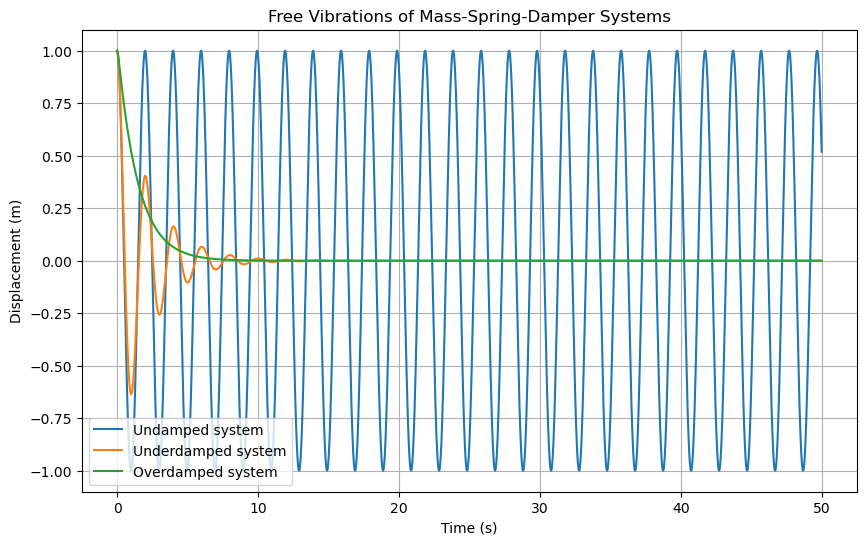

In [7]:
if __name__ == "__main__":
    main()

---
<img src="img/exercise.png" width="45"> **Exercise 2**

Iteratively modify the Python code to estimate the effect of mass and spring constant on the amplitude and frequency of the vibrations.

---

Execution time: 0.1161 seconds


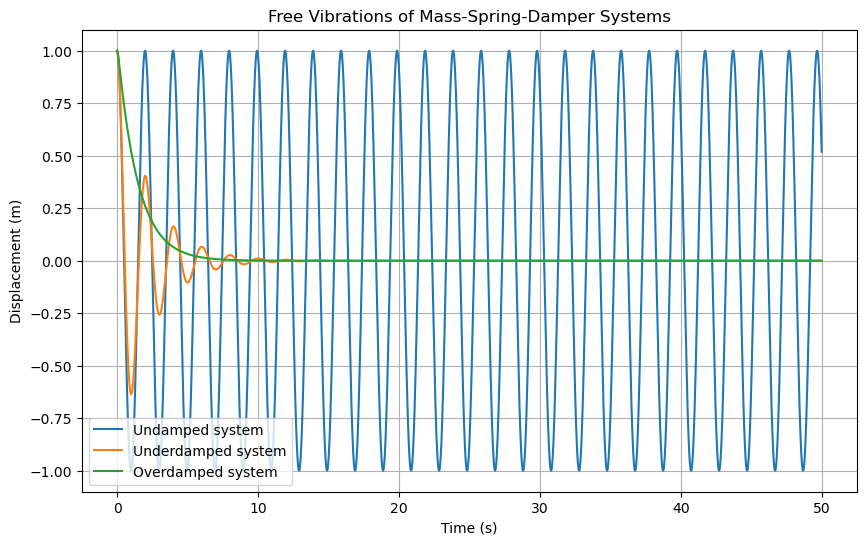

In [8]:
def main():
    # To calculate the execution time define start_time
    start_time = time.time()

    # End time of simulation and dt
    t_end = 50.0
    dt = 0.01

    # Define systems for free vibration cases (m, c, k, x0, v0, dt, t_end)
    ## In Python, we can use a list of tuples to store the parameters of each system
    systems = [
        (1.0, 0.0, 10.0, 1.0, 0.0, dt, t_end),  # Undamped system
        (1.0, 0.9, 10.0, 1.0, 0.0, dt, t_end),  # Underdamped system
        (1.0, 15.0, 10.0, 1.0, 0.0, dt, t_end),  # Overdamped system
    ]

    labels = ['Undamped', 'Underdamped', 'Overdamped']

    # Time vector for plotting
    t = np.arange(0, t_end, dt)

    # Plot the displacement over time for each system
    plt.figure(figsize=(10, 6))

    for i, system in enumerate(systems):
        x, v = free_vibration(*system)
        plt.plot(t, x, label=f'{labels[i]} system')

    # Print the total execution time
    print(f"Execution time: {time.time() - start_time:.4f} seconds")

    # Plot settings
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title('Free Vibrations of Mass-Spring-Damper Systems')
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()

---
<img src="img/exercise.png" width="45"> **Exercise 3**

Iteratively modify the Python code to evaluate the effect of time step size on the result. Compare the original case with the situations where $dt$ = 0.1 and $dt$ = 0.5.

---

Execution time: 0.0925 seconds


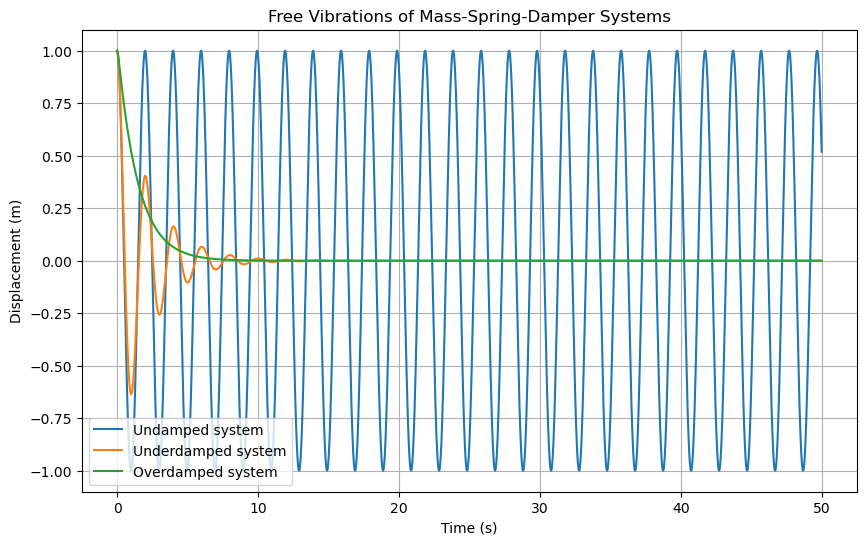

In [10]:
def main():
    # To calculate the execution time define start_time
    start_time = time.time()

    # End time of simulation and dt
    t_end = 50.0
    dt = 0.01

    # Define systems for free vibration cases (m, c, k, x0, v0, dt, t_end)
    ## In Python, we can use a list of tuples to store the parameters of each system
    systems = [
        (1.0, 0.0, 10.0, 1.0, 0.0, dt, t_end),  # Undamped system
        (1.0, 0.9, 10.0, 1.0, 0.0, dt, t_end),  # Underdamped system
        (1.0, 15.0, 10.0, 1.0, 0.0, dt, t_end),  # Overdamped system
    ]

    labels = ['Undamped', 'Underdamped', 'Overdamped']

    # Time vector for plotting
    t = np.arange(0, t_end, dt)

    # Plot the displacement over time for each system
    plt.figure(figsize=(10, 6))

    for i, system in enumerate(systems):
        x, v = free_vibration(*system)
        plt.plot(t, x, label=f'{labels[i]} system')

    # Print the total execution time
    print(f"Execution time: {time.time() - start_time:.4f} seconds")

    # Plot settings
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.title('Free Vibrations of Mass-Spring-Damper Systems')
    plt.legend()
    plt.grid(True)
    plt.show()
    
if __name__ == "__main__":
    main()

---
<img src="img/hw.png" width="40"> **Homework**

Supplement the previous code to also include a critically damped vibration system.

---

## References

J. Sundnes. *Introduction to Scientific Programming with Python*, Springer International Publishing, 2020.